In [80]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

In [98]:
def show_training(dataset, idx=None):
    if idx:
        history = read_dictionary = np.load(os.path.join ("models", dataset, "train_classifier_his_" + idx + ".npy"),allow_pickle='TRUE').item()
    else:
        history = read_dictionary = np.load(os.path.join ("models", dataset, "train_classifier_his.npy"),allow_pickle='TRUE').item()
    
    acc = history['acc']
    val_acc = history["val_acc"]

    loss = history['loss']
    val_loss = history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.plot([np.argmax(val_acc), np.argmax(val_acc)],
          plt.ylim(), label='Best accuracy: ' + str(np.max(val_acc)))
    plt.legend(loc='upper right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    # plt.ylim([0,1.0])
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

In [94]:
def show_tsne(dataset, classes):
    data = pd.read_csv(os.path.join("datasets", dataset, "compressed_train.csv")).values
    x = data[:,:-classes]
    y = data[:,-classes:]
    print(x.shape)

    y = np.argmax(y, axis=1)
#     return y
    tsne = TSNE(n_components=2, random_state=0, n_jobs=-1, n_iter=1500)
    intermediates_tsne = tsne.fit_transform(x)

    plt.figure(figsize=(8, 8))
    sns.scatterplot(
        x=intermediates_tsne[:,0], y=intermediates_tsne[:,1],
        hue=y,
        palette=sns.color_palette("hls", classes),
        legend=None,
        alpha=0.3
    )
#     sns.scatter(x = intermediates_tsne[:,0], y=intermediates_tsne[:,1], hue=y)
    plt.show()


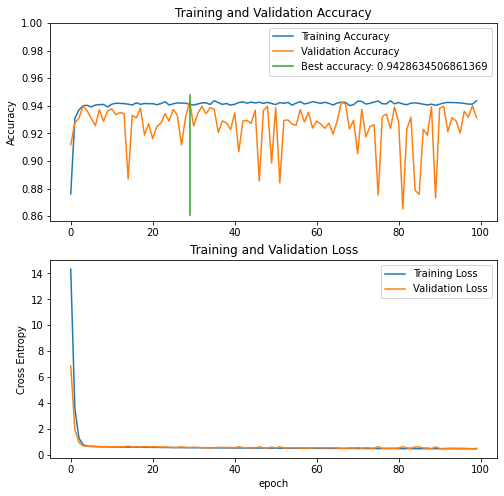

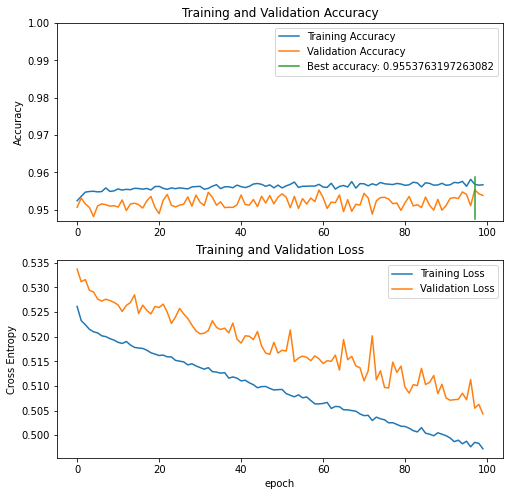

In [99]:
# Explore mnist dataset
show_training("mnist")
show_training("mnist", "2")


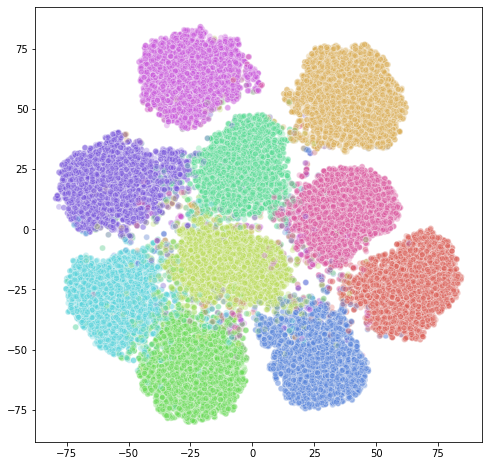

In [87]:
show_tsne("mnist", 10)

(40000, 138)


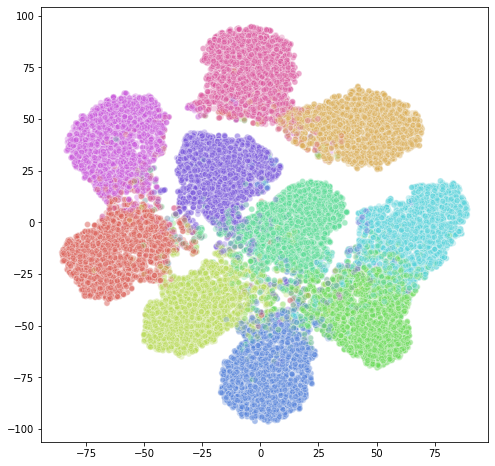

In [88]:
show_tsne("cifar10", 10)

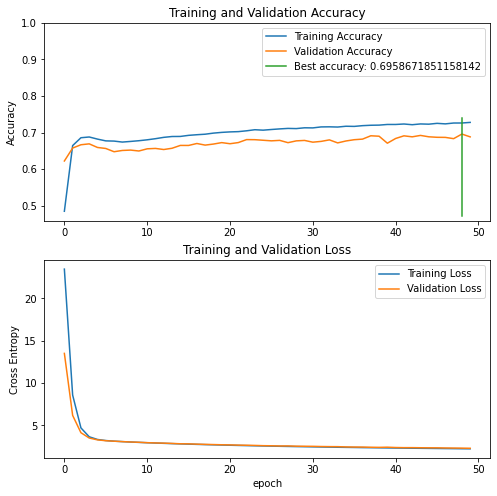

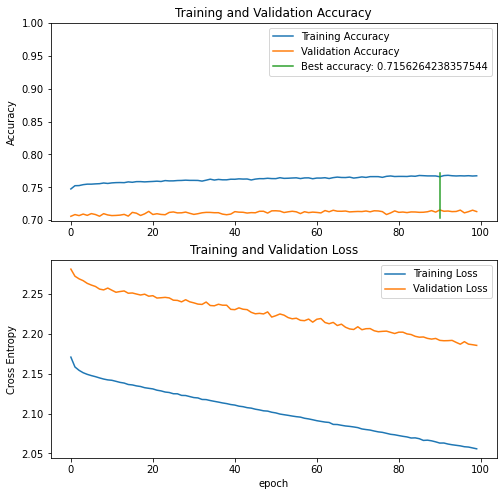

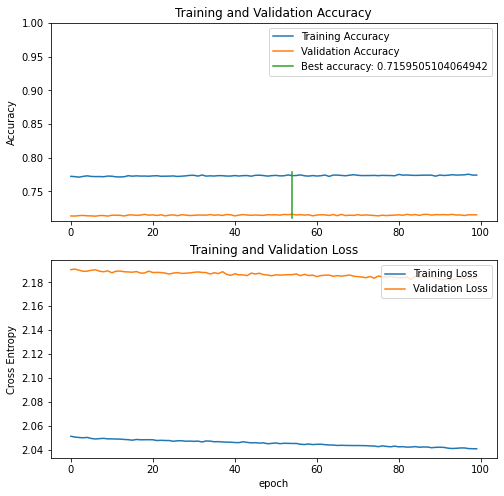

In [100]:
show_training("cifar100")
show_training("cifar100", "2")
show_training("cifar100", "3")

(40000, 128)


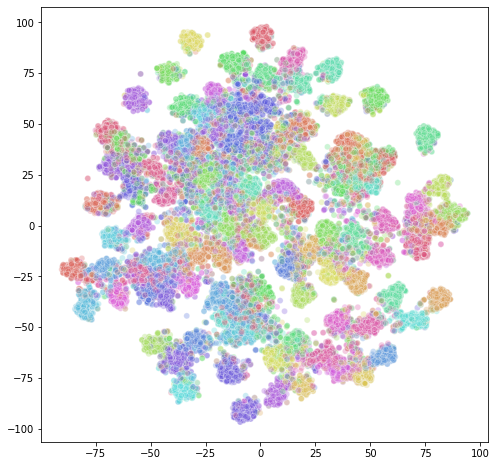

In [92]:
show_tsne("cifar100", 100)